<a href="https://colab.research.google.com/github/Jean-Rd/Algoritms_Intro_machineLearningWithPython/blob/master/Drug_data_my_algrtm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [333]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [334]:
url = r'https://raw.githubusercontent.com/Jean-Rd/Datasets/master/drug200.csv'

df = pd.read_csv(url)
'''
age=edad
sex=genero
bp=niveles de precisoon arterial
cholesterol = niveles del colesterol
na_tok = na racion de potasio
'''
df['Cholesterol'].value_counts()
# CHOLESTEROL// HIGH = 1; NORMAL = 0

bp = np.copy(df.BP.values)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


In [389]:
for i in range(len(df)):
  if df.Drug[i] == 'drugA':
    df.Drug[i] = 0
  if df.Drug[i] == 'drugB':
    df.Drug[i] = 1
  if df.Drug[i] == 'drugC':
    df.Drug[i] = 2
  if df.Drug[i] == 'drugX':
    df.Drug[i] = 3
  if df.Drug[i] == 'DrugY':
    df.Drug[i] = 4

df[['Drug']] = df[['Drug']].astype(int)

In [336]:
# BP --> niveles de precion arterial
# LOW = 0; NORMAL = 1; HIGH = 2

for i in range(len(df)):
  
  if df.BP[i] == 'LOW':
    df.BP[i] = 0

  elif df.BP[i] == 'NORMAL':
    df.BP[i] = 1

  elif df.BP[i] == 'HIGH':
    df.BP[i] = 2

df.head()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,2,HIGH,25.355,4
1,47,M,0,HIGH,13.093,2
2,47,M,0,HIGH,10.114,2
3,28,F,1,HIGH,7.798,3
4,61,F,0,HIGH,18.043,4


In [337]:
# sex
a = pd.get_dummies(df.Sex, prefix='gender', columns=['Sex'], drop_first=True)
# Cholesterol
b = pd.get_dummies(df.Cholesterol, prefix='Cholesterol', drop_first=True)

frames = [df, a, b]

y = df.Drug.values
y

array([4, 2, 2, 3, 4, 3, 4, 2, 4, 4, 2, 4, 4, 4, 3, 4, 3, 0, 2, 4, 4, 4,
       4, 4, 4, 4, 4, 3, 4, 4, 3, 1, 3, 4, 3, 3, 0, 3, 3, 3, 4, 1, 4, 3,
       3, 3, 0, 2, 4, 4, 4, 3, 4, 4, 1, 2, 1, 4, 3, 4, 4, 0, 4, 3, 1, 4,
       0, 3, 4, 4, 1, 4, 3, 4, 4, 4, 0, 4, 0, 3, 1, 3, 2, 0, 2, 1, 3, 4,
       4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 0, 0, 2, 3, 4, 3, 3, 4, 1, 4,
       0, 3, 3, 3, 3, 4, 3, 3, 0, 4, 4, 4, 4, 4, 1, 4, 4, 3, 4, 3, 4, 4,
       3, 4, 4, 3, 1, 0, 1, 3, 0, 4, 1, 4, 0, 3, 3, 0, 3, 2, 0, 1, 3, 3,
       4, 2, 0, 4, 2, 3, 3, 1, 3, 4, 4, 4, 4, 3, 4, 0, 3, 3, 4, 4, 0, 4,
       0, 4, 4, 4, 4, 3, 3, 4, 4, 4, 1, 0, 4, 4, 4, 0, 4, 2, 4, 2, 2, 3,
       3, 3], dtype=object)

In [338]:
frames = [df, a, b]

data = pd.concat(frames, axis=1)
data = data.drop(['Cholesterol', 'Sex', 'Drug'], axis=1)

In [339]:
# Change of type
data[['BP', 'gender_M', 'Cholesterol_NORMAL']] = data[['BP', 'gender_M', 'Cholesterol_NORMAL']].astype(int)


Quantity of females: 96
Percentage of females: 48.0%
Quantity of males: 104
Percentage of males: 52.0%


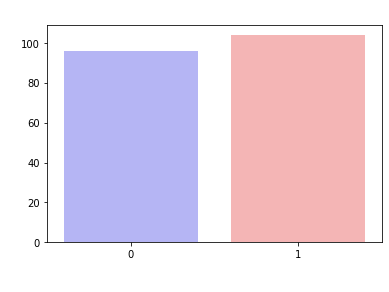

In [340]:
c_female = np.sum(data.gender_M.isin([0]))
c_male = np.sum(data.gender_M.isin([1]))

print('Quantity of females: {}'.format(c_female))
print('Percentage of females: {}%'.format((c_female/len(data))*100))
print('Quantity of males: {}'.format(c_male))
print('Percentage of males: {}%'.format((c_male/len(data))*100))

sns.countplot(x=data.gender_M, data=data, palette='bwr')
plt.title('Cantidad de mujeres ^ hombres', fontsize=15, color='white')

plt.xlabel('0 --> female\n 1 --> Male', color='white')
plt.ylabel('Count', color='white')
plt.xticks()
plt.show()

Quantity of patients with cholesterol NORMAL: 97
Percentage of cholesterol NORMAL: 48.5%
Quantity of patients with cholesterol HIGH: 103
Percentage of cholesterol HIGH: 51.5%


Text(0, 0.5, 'Count')

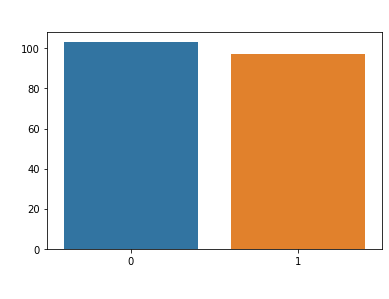

In [341]:
print('Quantity of patients with cholesterol NORMAL: {}'.format(sum(data.Cholesterol_NORMAL.isin([1]))))
print('Percentage of cholesterol NORMAL: {}%'.format(((sum(data['Cholesterol_NORMAL'].isin([1])))/len(data))*100))

print('Quantity of patients with cholesterol HIGH: {}'.format(sum(data.Cholesterol_NORMAL.isin([0]))))
print('Percentage of cholesterol HIGH: {}%'.format(((sum(data['Cholesterol_NORMAL'].isin([0])))/len(data))*100))

sns.countplot(x=data.Cholesterol_NORMAL, data=data)
plt.title('Quantity Cholesterol', fontsize=24, color='white')
plt.xlabel('0 --> HIGH\n 1 --> NORMAL', color='white')
plt.ylabel('Count', color='white')

In [342]:
df.groupby('Drug').mean()

,Age,Na_to_K
Drug,,
0,35.869565,10.918783
1,62.500000,11.524375
2,42.500000,10.633750
3,44.018519,10.650556
4,43.747253,22.374780


Quantity of patients with blood pressure low: 64
Percentage of patients with blood pressure low: 32.00
Quantity of patients with blood pressure normal: 59
Percentage of patients with blood pressure normal: 29.5
Quantity of patients with blood pressure high: 77
Percentage of patients with blood pressure high: 38.5


Text(0.5, 0, '0 --> Low\n1 --> Normal\n2 --> High')

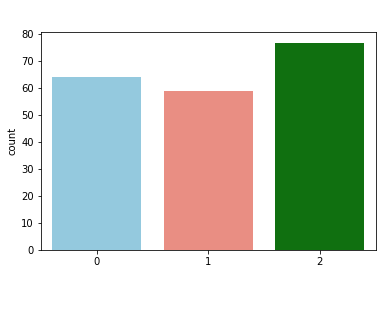

In [343]:
c_low = sum(data.BP.isin([0]))
c_normal = sum(data.BP.isin([1]))
c_high = sum(data.BP.isin([2]))

print('Quantity of patients with blood pressure low: {}'.format(c_low))
print('Percentage of patients with blood pressure low: {:.2f}'.format((c_low/len(data))* 100))

print('Quantity of patients with blood pressure normal: {}'.format(c_normal))
print('Percentage of patients with blood pressure normal: {}'.format((c_normal/len(data))*100))

print('Quantity of patients with blood pressure high: {}'.format(c_high))
print('Percentage of patients with blood pressure high: {}'.format((c_high/len(data))*100))

sns.countplot(x=data.BP, data=data, palette=['skyblue', 'salmon', 'green'])
plt.title('Blood Pressure', fontsize=24, color='white')
plt.xlabel('0 --> Low\n1 --> Normal\n2 --> High', color='white')


In [344]:
a = pd.get_dummies(bp, prefix='BP')

frame = [data, a]

x_data = pd.concat(frame, axis=1)
x_data.head()

X = x_data.drop(['BP'], axis=1)
X.head()

len(X) == len(y)

True

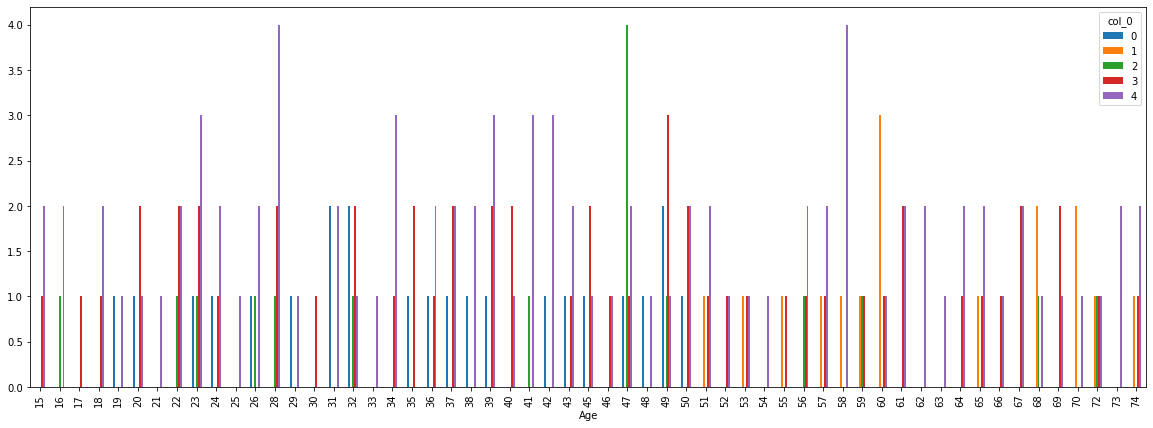

In [345]:
pd.crosstab(X.Age, y).plot(kind='bar', figsize=(20,7))

Text(0.5, 1.0, 'Frequency of Sex according Age')

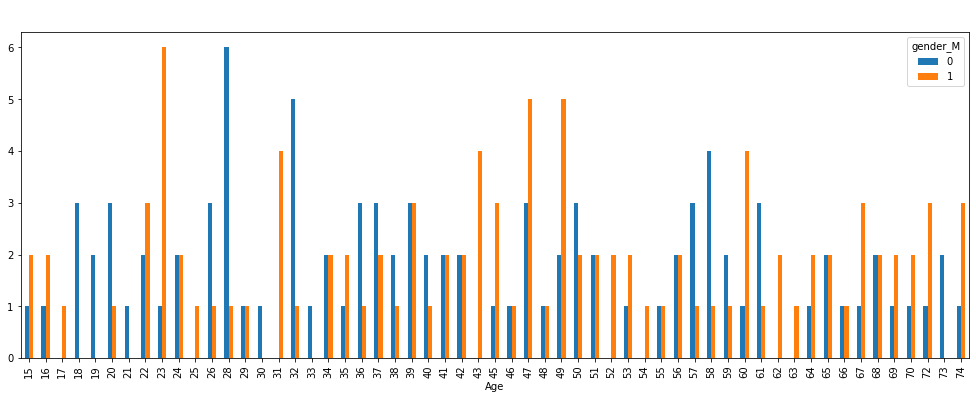

In [346]:
pd.crosstab(X.Age, X.gender_M).plot(kind='bar', figsize=(17,6))
plt.title('Frequency of Sex according Age', color='white', fontsize=24)

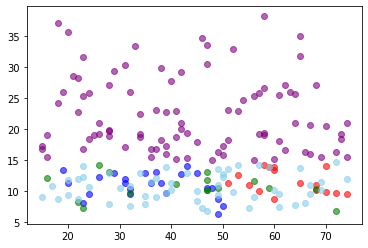

In [354]:
plt.scatter(df.Age[df.Drug == 0], df.Na_to_K[df.Drug == 0], c='blue', alpha=.6)
plt.scatter(df.Age[df.Drug == 1], df.Na_to_K[df.Drug == 1], c='red', alpha=.6)
plt.scatter(df.Age[df.Drug == 2], df.Na_to_K[df.Drug == 2], c='green', alpha=.6)
plt.scatter(df.Age[df.Drug == 3], df.Na_to_K[df.Drug == 3], c='skyblue', alpha=.6)
plt.scatter(df.Age[df.Drug == 4], df.Na_to_K[df.Drug == 4], c='purple', alpha=.6)

In [501]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
# import
import warnings
warnings.filterwarnings("ignore")

y = y.astype(int)
y.dtype
#X = np.array(X)
#y = np.array(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

_ = np.linspace(0.1, 1, 20)

mse = []
test = []
train = []

for i in _:
  
  lr = LogisticRegression(C = i, max_iter=250).fit(X_train, y_train)
  pred = lr.predict(X_train)
  mse.append(mean_squared_error(pred, y_train))
  test.append(lr.score(X_test, y_test))
  train.append(lr.score(X_train, y_train))



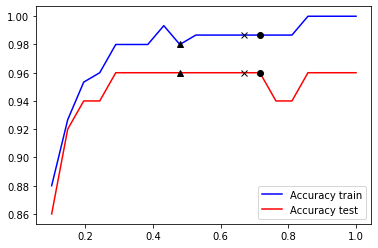

In [475]:
plt.plot(np.linspace(0.1,1,20), train, color='blue')
plt.plot(np.linspace(0.1,1,20), test, color='red')
plt.plot(np.linspace(0.1,1,20)[12], test[12], 'x', color='black')
plt.plot(np.linspace(0.1,1,20)[12], train[12], 'x', color='black')
plt.plot(np.linspace(0.1,1,20)[13], test[13], 'o', color='black')
plt.plot(np.linspace(0.1,1,20)[13], train[13], 'o', color='black')
plt.plot(np.linspace(0.1,1,20)[8], train[8], '^', color='black')
plt.plot(np.linspace(0.1,1,20)[8], test[8], '^', color='black')
plt.legend(['Accuracy train', 'Accuracy test'], loc=4)

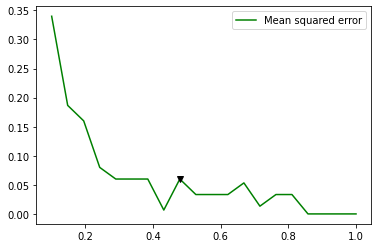

In [491]:
plt.plot(np.linspace(0.1, 1, 20), mse, color='green')
plt.plot(np.linspace(0.1, 1, 20)[8], mse[8], 'v', color='black')
plt.legend(['Mean squared error'])

In [502]:
C = np.linspace(0.1, 1, 20)[8]

logr = LogisticRegression(C=C, max_iter=250).fit(X_train, y_train)

y_head = logr.predict(X_test)

logr.score(X_test, y_test)

0.96

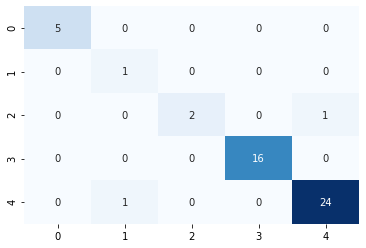

In [505]:
from sklearn.metrics import confusion_matrix

cm_lr = confusion_matrix(y_test, y_head)

sns.heatmap(cm_lr, cmap='Blues', annot=True, cbar=False)